In [1004]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option ('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Step 1: Data Loading and Overview

### 1. Download the dataset and load it into a Pandas DataFrame.

In [1007]:
df = pd.read_csv ("AmesHousing.csv")

### 2. Display the first 10 rows of the dataset to understand its structure.

In [1009]:
df.head (10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

### 3. Print a summary of the dataset, including:  
   - Number of rows and columns.  
   - Data types of each column.  
   - Count of missing values per column.

In [1011]:
print (df.shape)

(2930, 82)


In [1012]:
df.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

# Step 2: Data Cleaning

### . Handle missing values:  
   - Identify columns with missing data.  
   - Decide on appropriate strategies to fill or drop missing values.

In [1015]:
df_with_nulls = df[df.columns[df.isnull().any()]]
df_null = df.isnull().sum()[df.isnull().any()]
df_null

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [1016]:
df ['Lot Frontage'] = round (df ['Lot Frontage'].fillna (df['Lot Frontage'].mean ()),1)

In [1017]:
df['Alley'] = df['Alley'].fillna ('No')

In [1018]:
df ['Mas Vnr Type'] = df ['Mas Vnr Type'].fillna ('None')

In [1019]:
df ['Mas Vnr Area'] = df ['Mas Vnr Area'].fillna (df['Mas Vnr Area'].mode ()[0])

In [1020]:
df['Bsmt Qual'] = df['Bsmt Qual'].fillna ('TA')

In [1021]:
df['Bsmt Cond'] = df['Bsmt Qual'].fillna ('TA')

In [1022]:
df ['Bsmt Exposure'] = df ['Bsmt Exposure'].fillna ('No')

In [1023]:
df ['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna ('Unf')

In [1024]:
df ['BsmtFin SF 1'] = df ['BsmtFin SF 1'].fillna (0)

In [1025]:
df ['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna ('Unf')

In [1026]:
df ['BsmtFin SF 2'] = df ['BsmtFin SF 2'].fillna (0)

In [1027]:
df ['Bsmt Unf SF'] = df ['Bsmt Unf SF'].fillna (0)

In [1028]:
df ['Total Bsmt SF'] = df ['Total Bsmt SF'].fillna (0)

In [1029]:
df ['Electrical'] = df ['Electrical'].fillna (df['Electrical'].mode ()[0])

In [1030]:
df ['Bsmt Full Bath'] = df ['Bsmt Full Bath'].fillna (0)

In [1031]:
df ['Bsmt Half Bath'] = df ['Bsmt Half Bath'].fillna (0)

In [1032]:
df ['Fireplace Qu'] = df ['Fireplace Qu'].fillna ('None')

In [1033]:
df ['Garage Type'] = df['Garage Type'].fillna ('No garage')

In [1034]:
df ['Garage Yr Blt'] = df ['Garage Yr Blt'].fillna (0)

In [1035]:
df ['Garage Finish'] = df ['Garage Finish'].fillna (0)

In [1036]:
df ['Garage Cars'] = df ['Garage Cars'].fillna (2)

In [1037]:
df ['Garage Area'] = df ['Garage Area'].fillna (0)

In [1038]:
df ['Garage Qual'] = df ['Garage Qual'].fillna ('None')

In [1039]:
df ['Garage Cond'] = df ['Garage Cond'].fillna ('None')

In [1040]:
df ['Pool QC'] = df ['Pool QC'].fillna ('None')

In [1041]:
df ['Fence'] = df ['Fence'].fillna ('None')

In [1042]:
df ['Misc Feature'] = df ['Misc Feature'].fillna ('None')

### 2. Check for duplicate rows and remove them if necessary.  

In [1044]:
df.duplicated ().sum ()

0

### 3. Convert data types if required (e.g., categorical columns).

In [1046]:
df['Year Built'] = df['Year Built'].astype(object)

In [1047]:
df['Year Remod/Add'] = df ['Year Remod/Add'].astype (object)

In [1048]:
df['Overall Qual'] = df ['Overall Qual'].astype (object)

In [1049]:
df['Order'] = df['Order'].astype (object)

In [1050]:
df['PID'] = df['PID'].astype (object)

In [1051]:
df ['MS SubClass'] = df ['MS SubClass'].astype (object)

In [1052]:
df['Overall Cond'] = df ['Overall Cond'].astype (object)

In [1053]:
df['Bsmt Full Bath'] = df ['Bsmt Full Bath'].astype (object)

In [1054]:
df['Bsmt Half Bath'] = df ['Bsmt Half Bath'].astype (object)

In [1055]:
df['Full Bath'] = df ['Full Bath'].astype (object)

In [1056]:
df['Half Bath'] = df ['Half Bath'].astype (object)

In [1057]:
df['Bedroom AbvGr'] = df ['Bedroom AbvGr'].astype (object)

In [1058]:
df['Kitchen AbvGr'] = df ['Kitchen AbvGr'].astype (object)

In [1059]:
df['TotRms AbvGrd'] = df['TotRms AbvGrd'].astype (object)

In [1060]:
df['Fireplaces'] = df['Fireplaces'].astype (object)

In [1061]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].astype (object)

In [1062]:
df['Garage Cars'] = df['Garage Cars'].astype (object)

In [1063]:
df['Mo Sold'] = df['Mo Sold'].astype (object)

In [1064]:
df['Yr Sold'] = df['Yr Sold'].astype (object)

# Step 3 Descriptive Statistics

### 1. Compute and display summary statistics for all numerical columns.

In [1067]:
print (df.describe ())

       Lot Frontage       Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count   2930.000000    2930.000000   2930.000000   2930.000000   2930.000000   
mean      69.220478   10147.921843    101.096928    442.478498     49.705461   
std       21.321525    7880.017759    178.634545    455.586452    169.142089   
min       21.000000    1300.000000      0.000000      0.000000      0.000000   
25%       60.000000    7440.250000      0.000000      0.000000      0.000000   
50%       69.200000    9436.500000      0.000000    370.000000      0.000000   
75%       78.000000   11555.250000    162.750000    734.000000      0.000000   
max      313.000000  215245.000000   1600.000000   5644.000000   1526.000000   

       Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  2930.000000    2930.000000  2930.000000  2930.000000      2930.000000   
mean    559.071672    1051.255631  1159.557679   335.455973         4.676792   
std     439.540571     440.968018   391

### 2. Analyze the range and distribution of the target variable (`SalePrice`).

In [1069]:
print("Min:", df['SalePrice'].min())
print("Max:", df['SalePrice'].max())
print("Range:", df['SalePrice'].max() - df['SalePrice'].min())

Min: 12789
Max: 755000
Range: 742211


### 3. Identify key metrics for important features like `LotArea`, `YearBuilt`, and `OverallQual`.

In [1071]:
df['Lot Area'].describe()

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

In [1072]:
df['Year Built'].describe(include = 'object')

count     2930
unique     118
top       2005
freq       142
Name: Year Built, dtype: int64

In [1073]:
df ['Overall Qual'].describe ()

count     2930
unique      10
top          5
freq       825
Name: Overall Qual, dtype: int64

# Step 4: Univariate Analysis

### 1. Plot histograms or KDE plots for numerical columns like `SalePrice`, `LotArea`, and `GrLivArea`.

In [1076]:

%matplotlib inline
import matplotlib.pyplot as plt

In [1077]:
bins = np.linspace(min(df["SalePrice"]), max(df["SalePrice"]), 4)
bins

array([ 12789.        , 260192.66666667, 507596.33333333, 755000.        ])

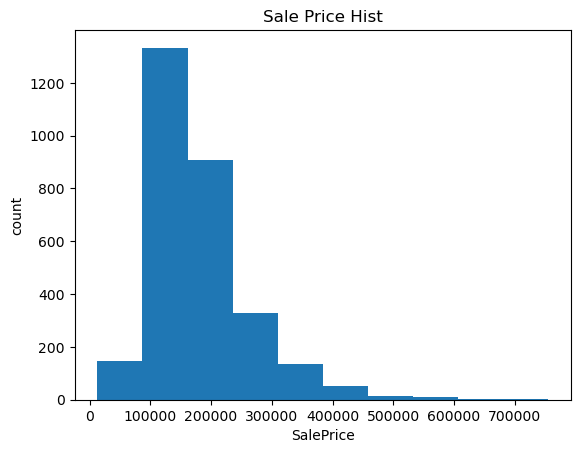

In [1078]:
#group_names = ['Low', 'Medium', 'High']
#df ['SalePrice_binned'] = pd.cut (df ['SalePrice'], bins, labels = group_names, include_lowest = True)

df['SalePrice'].value_counts ()

plt.hist(df["SalePrice"])
plt.xlabel("SalePrice")
plt.ylabel("count")
plt.title("Sale Price Hist")
plt.show ()

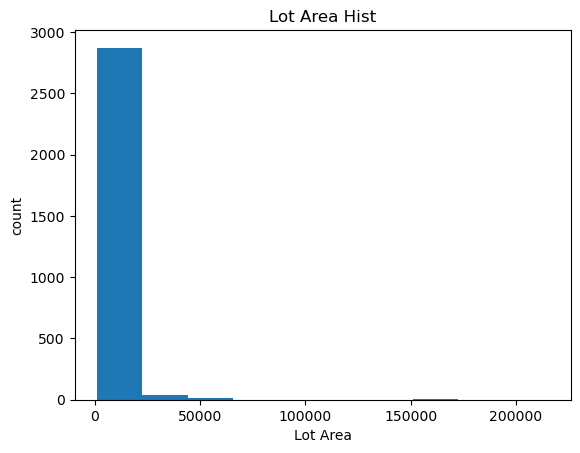

In [1079]:
df['Lot Area'].value_counts ()

plt.hist(df["Lot Area"])
plt.xlabel("Lot Area")
plt.ylabel("count")
plt.title("Lot Area Hist")
plt.show ()

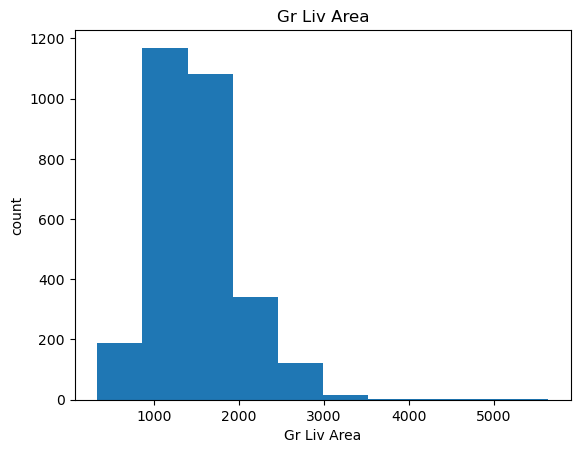

In [1080]:
df['Gr Liv Area'].value_counts ()

plt.hist(df["Gr Liv Area"])
plt.xlabel("Gr Liv Area")
plt.ylabel("count")
plt.title("Gr Liv Area")
plt.show ()

### 2. Create bar charts for categorical variables such as `Neighborhood`, `OverallQual`, and `HouseStyle`.

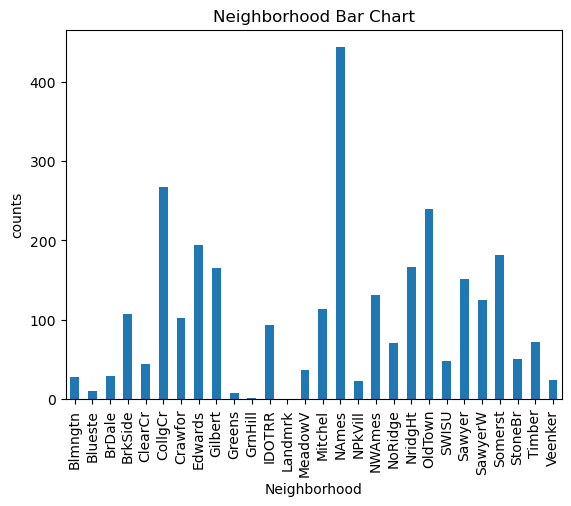

In [1082]:
Neighborhood_counts = df['Neighborhood'].value_counts().sort_index()
Neighborhood_counts.plot(kind='bar')
plt.title ('Neighborhood Bar Chart')
plt.xlabel ('Neighborhood')
plt.ylabel ('counts')
plt.show ()

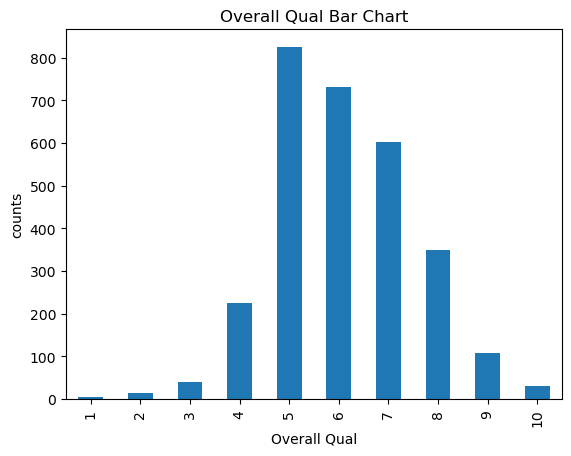

In [1083]:
Overall_Qual_counts = df['Overall Qual'].value_counts().sort_index()
Overall_Qual_counts.plot(kind='bar')
plt.title ('Overall Qual Bar Chart')
plt.xlabel ('Overall Qual')
plt.ylabel ('counts')
plt.show ()

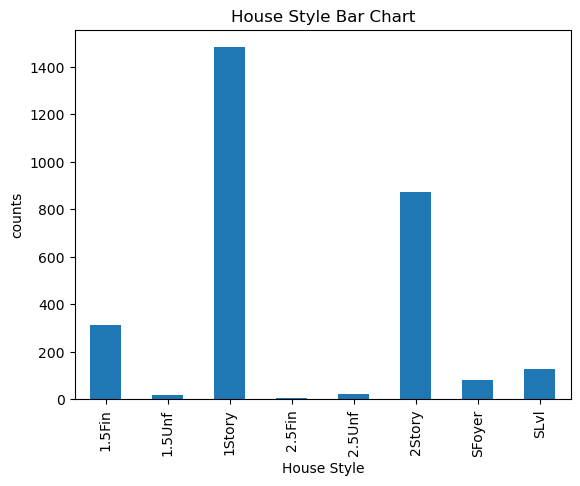

In [1084]:
House_Style_counts = df['House Style'].value_counts().sort_index()
House_Style_counts.plot(kind='bar')
plt.title ('House Style Bar Chart')
plt.xlabel ('House Style')
plt.ylabel ('counts')
plt.show ()

# Step 5: Bivariate Analysis

### 1. Investigate the relationship between `SalePrice` and the following features:  
   - `GrLivArea`  
   - `OverallQual`  
   - `YearBuilt`
 Use scatter plots and correlation coefficients to analyze these relationships.

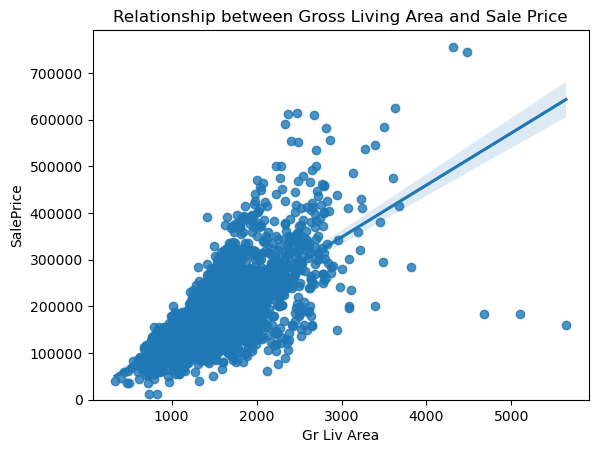

In [1087]:
#Relationship between GrLiv Area and SalePrice
sns.regplot (x="Gr Liv Area", y = "SalePrice", data = df)
plt.ylim (0,)
plt.title("Relationship between Gross Living Area and Sale Price")
plt.show ()

In [1195]:

pearson_coef, p_value = stats.pearsonr (df['Gr Liv Area'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.7067799209766281 with a P-value of P = 0.00000000000000000000


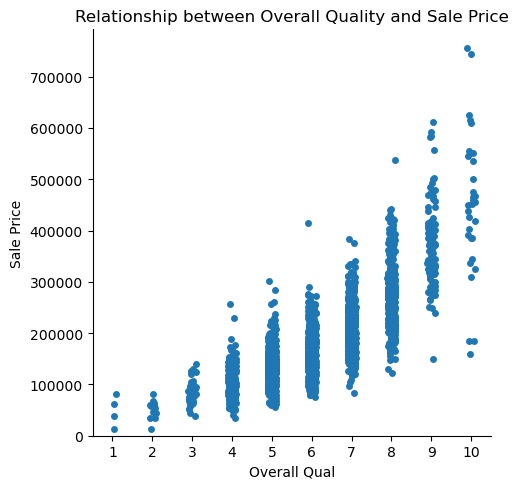

In [1088]:
#Relationship between Overall Qual and SalePrice
sns.catplot (x="Overall Qual", y = "SalePrice", data = df,)
plt.ylim (0,)
plt.title("Relationship between Overall Quality and Sale Price")
plt.xlabel("Overall Qual")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show ()

In [1197]:

pearson_coef, p_value = stats.pearsonr (df['Overall Qual'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.7992617947690118 with a P-value of P = 0.00000000000000000000


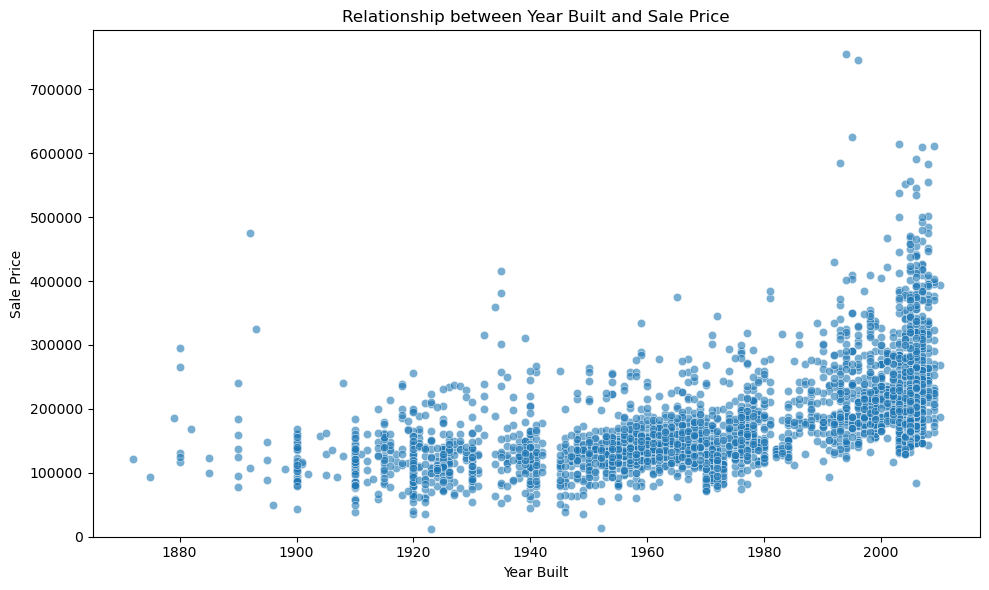

In [1089]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year Built", y="SalePrice", data=df, alpha=0.6)
plt.ylim(0,)
plt.title("Relationship between Year Built and Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

In [1199]:

pearson_coef, p_value = stats.pearsonr (df['Year Built'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.558426105712046 with a P-value of P = 0.00000000000000000000


### 2. Create box plots to visualize the distribution of `SalePrice` across:  
   - `Neighborhood`  
   - `HouseStyle`

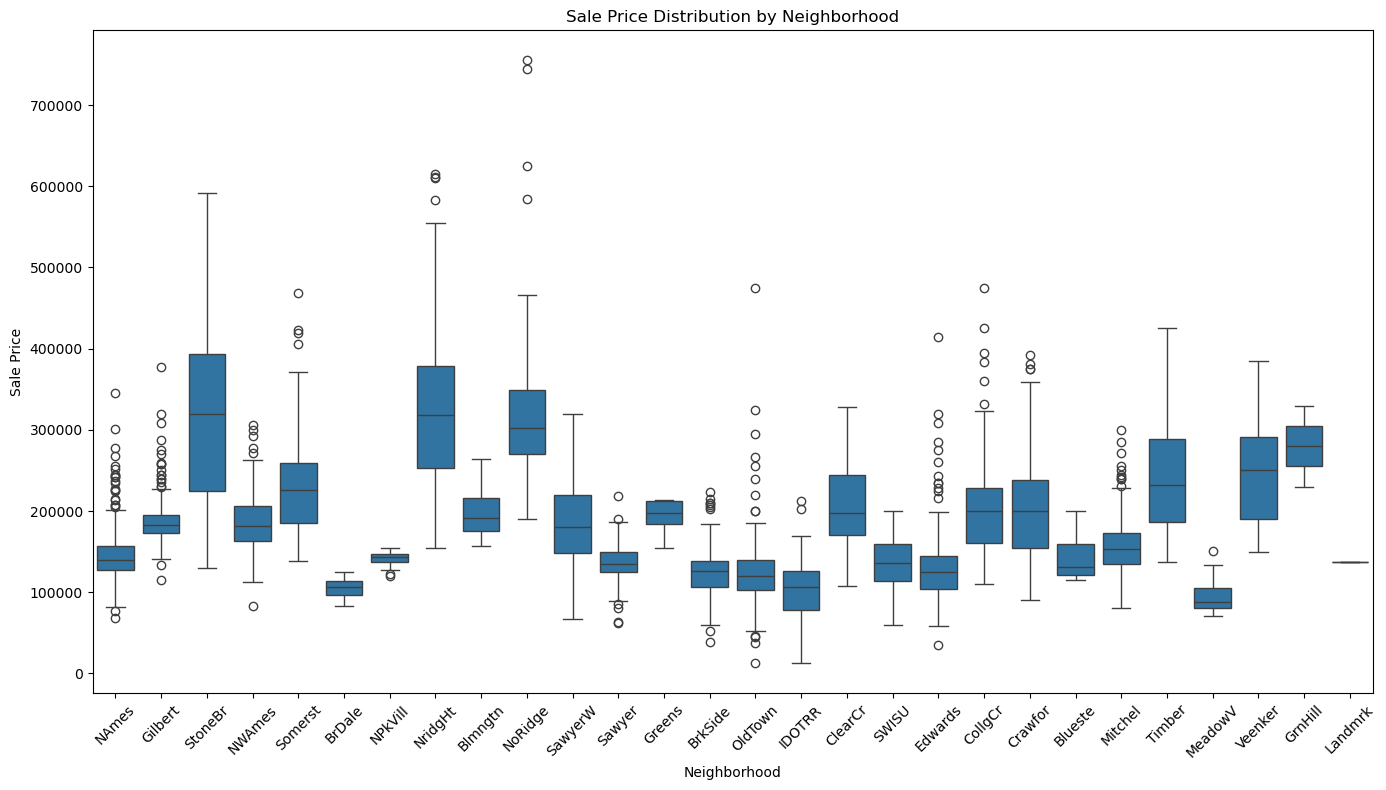

In [1091]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

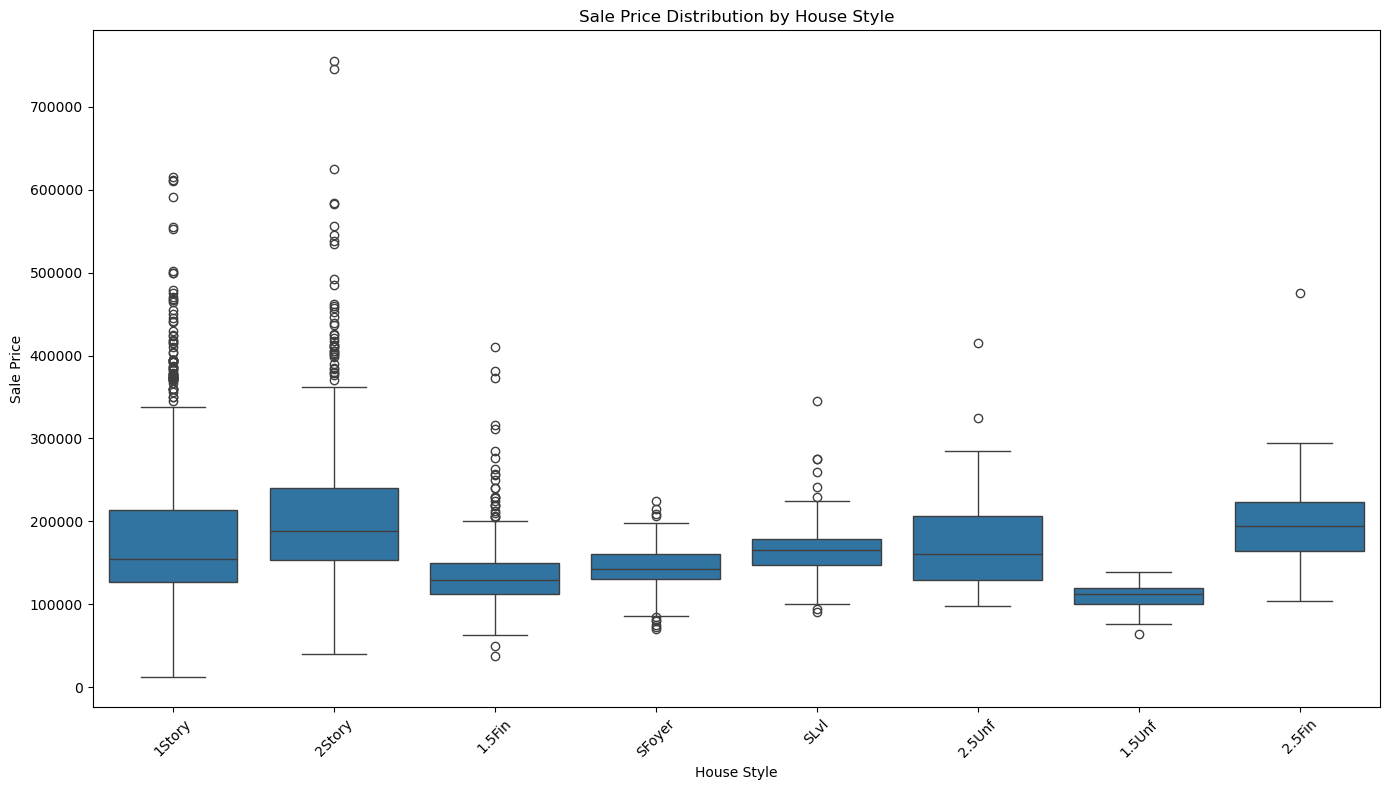

In [1092]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="House Style", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by House Style")
plt.xlabel("House Style")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

# Step 6: Feature Relationships and Correlations

### 1. Compute the correlation matrix for numerical variables and visualize it using a heatmap.

In [1095]:
numeric_columns = df.select_dtypes(include=["int", "float"]).columns
numeric_columns

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [1096]:
df_numeric = df[numeric_columns]
df_numeric.head (10)

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,528.0,210,62,0,0,0,0,0,215000
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,730.0,140,0,0,0,120,0,0,105000
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,312.0,393,36,0,0,0,0,12500,172000
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,522.0,0,0,0,0,0,0,0,244000
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,482.0,212,34,0,0,0,0,0,189900
5,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,470.0,360,36,0,0,0,0,0,195500
6,41.0,4920,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,582.0,0,0,170,0,0,0,0,213500
7,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,506.0,0,82,0,0,144,0,0,191500
8,39.0,5389,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,608.0,237,152,0,0,0,0,0,236500
9,60.0,7500,0.0,0.0,0.0,994.0,994.0,1028,776,0,1804,442.0,140,60,0,0,0,0,0,189000


In [1097]:
df_numeric.corr()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Lot Frontage,1.000000,0.365450,0.202245,0.199417,0.040003,0.107136,0.328161,0.423155,0.026197,0.005018,0.350707,0.338082,0.104596,0.150421,0.011694,0.025494,0.070085,0.160702,0.035915,0.340743
Lot Area,0.365450,1.000000,0.125950,0.191692,0.083198,0.023883,0.253765,0.332235,0.032996,0.000812,0.285599,0.212749,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.266549
Mas Vnr Area,0.202245,0.125950,1.000000,0.299951,-0.014955,0.089662,0.393530,0.392280,0.120159,-0.057173,0.400703,0.370479,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,0.502196
BsmtFin SF 1,0.199417,0.191692,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.309649,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,0.433147
BsmtFin SF 2,0.040003,0.083198,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,0.006018
Bsmt Unf SF,0.107136,0.023883,0.089662,-0.477244,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.183308
Total Bsmt SF,0.328161,0.253765,0.393530,0.536731,0.090109,0.412248,1.000000,0.800429,-0.204487,-0.023180,0.445108,0.485608,0.230290,0.245941,-0.084848,0.037918,0.075499,0.072109,0.083895,0.632529
1st Flr SF,0.423155,0.332235,0.392280,0.457586,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.621676
2nd Flr SF,0.026197,0.032996,0.120159,-0.163710,-0.098188,0.002320,-0.204487,-0.250057,1.000000,0.018024,0.655251,0.127508,0.089097,0.184538,0.055429,-0.032172,0.011741,0.044602,-0.005078,0.269373
Low Qual Fin SF,0.005018,0.000812,-0.057173,-0.066129,-0.004989,0.047207,-0.023180,-0.012689,0.018024,1.000000,0.097050,-0.053390,-0.015646,-0.000761,0.087326,-0.004505,0.006943,0.035200,-0.005939,-0.037660


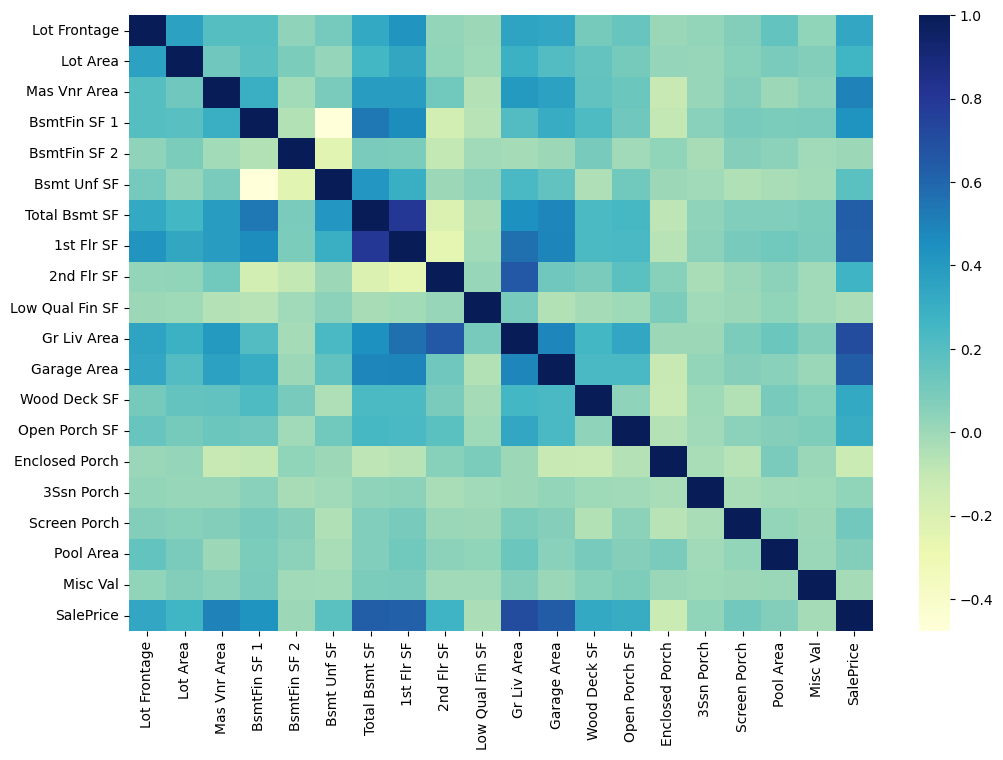

In [1098]:
plt.figure(figsize=(12, 8)) 
sns.heatmap (df_numeric.corr(), cmap = 'YlGnBu')
plt.show()

### 2. Identify the features most strongly correlated with `SalePrice` and discuss their significance.

In [1100]:
#Pearson Correlation Coefficient and P-value of Total Bsmt SF vs SalePrice

pearson_coef, p_value = stats.pearsonr (df['Total Bsmt SF'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.632528849032033 with a P-value of P = 0.00000000000000000000


In [1101]:
#Pearson Correlation Coefficient and P-value of Gr Liv Area vs SalePrice

pearson_coef, p_value = stats.pearsonr (df['Gr Liv Area'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.7067799209766281 with a P-value of P = 0.00000000000000000000


In [1102]:
#Pearson Correlation Coefficient and P-value of 1st Flr SF vs SalePrice

pearson_coef, p_value = stats.pearsonr (df['1st Flr SF'], df['SalePrice'])
print (f"The Pearson Correlation Coefficient is, {pearson_coef} with a P-value of P = {p_value:.20f}")

The Pearson Correlation Coefficient is, 0.6216760632702532 with a P-value of P = 0.00000000000000000000


# Step 7: Advanced Visualizations (Optional)

### 1. Create pair plots for selected features such as `SalePrice`, `GrLivArea`, `YearBuilt`, and `OverallQual`.

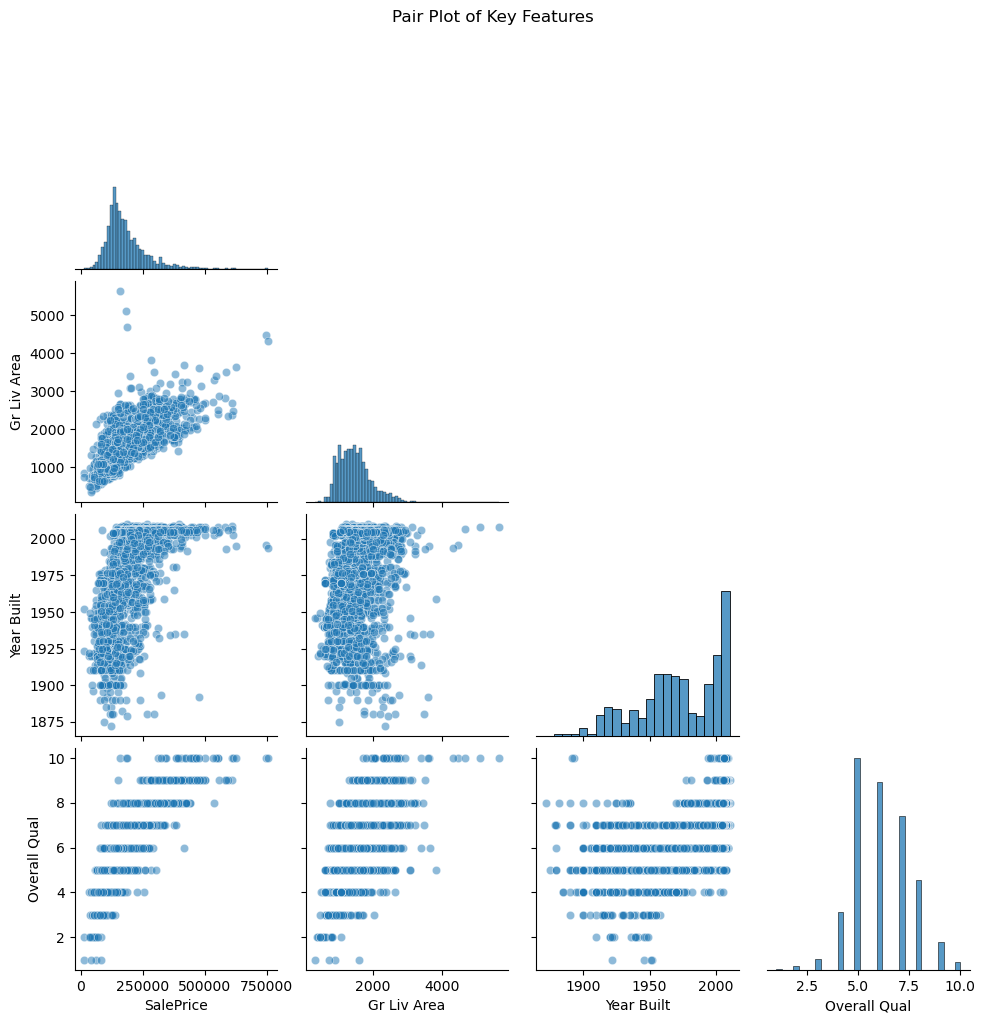

In [1193]:
selected_features = ["SalePrice", "Gr Liv Area", "Year Built", "Overall Qual"]
sns.pairplot(df[selected_features], corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

# Step 8: Insights and Summary

### 1. Write a summary of the key findings from your EDA.  
   - Which features have the strongest influence on `SalePrice`?  
   - Are there any surprising trends or patterns?

#### Findings
There is positive strong correlation between SalePrice and Overall Quality of the house. yity The houses with more Overall Quality would be sold for better price. 

Also there is average positive correlation between the the Year Built and the Sale Price. The houses built in later years tend to be sold for more price.

The Sale Price has slightly strong relationship with Total Basement Square Foot, Gross Living Area and Square Foot of First Floor, which means that the houses with more total basement squarefoot, more gross living area and more 1st floor squarefoot will be sold for more price.